<a href="https://colab.research.google.com/github/FelixCinq-Mars/Air-Quality-Data-Science/blob/main/Montreal_Air_Quality_Machine_Learning_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Predicting Montreal Air Quality

##A Machine Learning Project

By Félix Cinq-Mars

#Introduction

In this project, we want to study data from the Montreal Open Data Portal which can be accessed through here: https://donnees.montreal.ca/.

The dataset we want to analyze is the air quality in the Montreal area. We'll use the data to answer basic questions like: "Which pollutant has the worst air quality index?" or "Which borough has the worst air quality?".

Then, we will try to predict air quality based on existing data using machine learning.

#Data Pre-Processing

##Importing Packages

In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

##Discussing Data Quality

The Montreal Air Quality dataset comes from the Montreal Open Data Portal: https://donnees.montreal.ca/ville-de-montreal/rsqa-indice-qualite-air

We have two datasets: one dataset showing the air quality index (IQA) per air quality station, the other showing information about each air quality station. Let's import the datasets.

Here is the IQA per station:

In [72]:
air_quality_df = pd.read_csv('https://data.montreal.ca/dataset/3e9f7b96-3f25-4404-a5ad-22d9a31060e6/resource/a25fdea2-7e86-42ac-8301-ca77db3ff17e/download/rsqa-indice-qualite-air.csv')

In [73]:
air_quality_df.head(10)

,stationId,polluant,valeur,date,heure
0,3,NO2,1,2022-11-21,0
1,3,O3,18,2022-11-21,0
2,3,PM,5,2022-11-21,0
3,3,SO2,2,2022-11-21,0
4,6,NO2,1,2022-11-21,0
5,6,O3,18,2022-11-21,0
6,6,PM,2,2022-11-21,0
7,6,SO2,1,2022-11-21,0
8,17,CO,1,2022-11-21,0
9,17,NO2,1,2022-11-21,0


Here is the information about each station:

In [74]:
air_stations_df = pd.read_csv('https://data.montreal.ca/dataset/ae01f7f3-4d69-404a-9be1-74abfdc96571/resource/29db5545-89a4-4e4a-9e95-05aa6dc2fd80/download/liste-des-stations-rsqa.csv')


In [75]:
air_stations_df.head(10)

,numero_station,SNPA,statut,nom,adresse,arrondissement_ville,latitude,longitude,X,Y,secteur_id,secteur_nom,hauteur
0,1,50102.0,fermé,Jardin Botanique,"Jardin Botanique, Montréal",Rosemont-La Petite-Patrie,45.562210,-73.571785,299196.165787,5.046925e+06,1,Centre-Ville,4.0
1,3,50103.0,ouvert,Saint-Jean-Baptiste,"1050 A, St-Jean-Baptiste",Rivière-des-Prairies,45.641026,-73.499682,304824.789662,5.055681e+06,4,Est,4.0
2,6,50124.0,ouvert,Anjou,7650 rue Châteauneuf,Anjou,45.602846,-73.558874,300207.366295,5.051440e+06,4,Est,12.0
3,7,50133.0,fermé,Chénier,Aréna Chénier (coin Chénier et Avenue de l'Aréna),Anjou,45.601760,-73.541992,301524.231483,5.051318e+06,4,Est,4.0
4,12,50104.0,fermé,Ontario,1125 Ontario,Ville-Marie,45.520550,-73.563222,299860.982713,5.042294e+06,1,Centre-Ville,16.0
5,13,50105.0,fermé,Drummond,1212 Drummond,Ville-Marie,45.497859,-73.573035,299092.080351,5.039773e+06,1,Centre-Ville,NaN
6,17,50135.0,ouvert,Caserne 17,4240 rue Charleroi,Montréal-Nord,45.593325,-73.637328,294085.527312,5.050389e+06,3,Nord,15.0
7,28,50109.0,ouvert,Échangeur Décarie,2495 Duncan,Mont-Royal,45.502648,-73.663913,291990.759168,5.040316e+06,3,Nord,4.0
8,29,50110.0,fermé,Parc Pilon,"11280 Pie IX, (Parc Pilon)",Montréal-Nord,45.594576,-73.641535,293757.538178,5.050529e+06,3,Nord,4.0
9,31,50136.0,ouvert,Saint-Dominique,"75, rue Ontario Est",Ville-Marie,45.512189,-73.566842,299577.408388,5.041365e+06,1,Centre-Ville,15.0


Next up we want to merge those two datasets to use only one.

In [76]:
air_stations_df.rename(columns = {'numero_station':'stationId'}, inplace=True)
df = air_quality_df.merge(air_stations_df, on='stationId')
df.head(5)

,stationId,polluant,valeur,date,heure,SNPA,statut,nom,adresse,arrondissement_ville,latitude,longitude,X,Y,secteur_id,secteur_nom,hauteur
0,3,NO2,1,2022-11-21,0,50103.0,ouvert,Saint-Jean-Baptiste,"1050 A, St-Jean-Baptiste",Rivière-des-Prairies,45.641026,-73.499682,304824.789662,5.055681e+06,4,Est,4.0
1,3,O3,18,2022-11-21,0,50103.0,ouvert,Saint-Jean-Baptiste,"1050 A, St-Jean-Baptiste",Rivière-des-Prairies,45.641026,-73.499682,304824.789662,5.055681e+06,4,Est,4.0
2,3,PM,5,2022-11-21,0,50103.0,ouvert,Saint-Jean-Baptiste,"1050 A, St-Jean-Baptiste",Rivière-des-Prairies,45.641026,-73.499682,304824.789662,5.055681e+06,4,Est,4.0
3,3,SO2,2,2022-11-21,0,50103.0,ouvert,Saint-Jean-Baptiste,"1050 A, St-Jean-Baptiste",Rivière-des-Prairies,45.641026,-73.499682,304824.789662,5.055681e+06,4,Est,4.0
4,3,NO2,1,2022-11-21,1,50103.0,ouvert,Saint-Jean-Baptiste,"1050 A, St-Jean-Baptiste",Rivière-des-Prairies,45.641026,-73.499682,304824.789662,5.055681e+06,4,Est,4.0


In [77]:
df.shape

(609, 17)

So we have 17 columns. However, we won't use all of them in the prediction of air quality. We will drop of few that we judge unnecessary for our study.

##Applying Pre-Processing Techniques

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 609 entries, 0 to 608
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   stationId             609 non-null    int64  
 1   polluant              609 non-null    object 
 2   valeur                609 non-null    int64  
 3   date                  609 non-null    object 
 4   heure                 609 non-null    int64  
 5   SNPA                  609 non-null    float64
 6   statut                609 non-null    object 
 7   nom                   609 non-null    object 
 8   adresse               609 non-null    object 
 9   arrondissement_ville  609 non-null    object 
 10  latitude              609 non-null    float64
 11  longitude             609 non-null    float64
 12  X                     609 non-null    float64
 13  Y                     609 non-null    float64
 14  secteur_id            609 non-null    int64  
 15  secteur_nom           6

In [79]:
df = df.drop(columns=['SNPA','statut','nom','latitude','longitude','X','Y','secteur_id','adresse','date'])

In [80]:
df.head(10)

,stationId,polluant,valeur,heure,arrondissement_ville,secteur_nom,hauteur
0,3,NO2,1,0,Rivière-des-Prairies,Est,4.0
1,3,O3,18,0,Rivière-des-Prairies,Est,4.0
2,3,PM,5,0,Rivière-des-Prairies,Est,4.0
3,3,SO2,2,0,Rivière-des-Prairies,Est,4.0
4,3,NO2,1,1,Rivière-des-Prairies,Est,4.0
5,3,O3,18,1,Rivière-des-Prairies,Est,4.0
6,3,PM,4,1,Rivière-des-Prairies,Est,4.0
7,3,SO2,1,1,Rivière-des-Prairies,Est,4.0
8,3,NO2,1,2,Rivière-des-Prairies,Est,4.0
9,3,O3,17,2,Rivière-des-Prairies,Est,4.0


In [81]:
df['arrondissement_ville'].unique()


array(['Rivière-des-Prairies', 'Anjou', 'Montréal-Nord', 'Mont-Royal',
       'Ville-Marie', 'Hochelaga-Maisonneuve', 'Dorval',
       'Rosemont-La Petite-Patrie', 'Sainte-Anne-de-Bellevue',
       'Sud-Ouest'], dtype=object)

In [82]:
df.shape

(609, 7)

We now have 9 columns that are usable.

Now, let's check if there is any null values.

In [83]:
df.isnull().values.any()

False

Let's check for correlation between values.

In [84]:
df.corr()

,stationId,valeur,heure,hauteur
stationId,1.000000,0.081620,0.013542,-0.304881
valeur,0.081620,1.000000,0.067270,-0.102317
heure,0.013542,0.067270,1.000000,0.008972
hauteur,-0.304881,-0.102317,0.008972,1.000000


There are no correlation between values, we can continue with this data.

Let's change categorical data into discrete data.

In [85]:
df['secteur_nom'].unique()

array(['Est', 'Nord', 'Centre-Ville', 'Ouest'], dtype=object)

In [86]:
df['arrondissement_ville'].unique()


array(['Rivière-des-Prairies', 'Anjou', 'Montréal-Nord', 'Mont-Royal',
       'Ville-Marie', 'Hochelaga-Maisonneuve', 'Dorval',
       'Rosemont-La Petite-Patrie', 'Sainte-Anne-de-Bellevue',
       'Sud-Ouest'], dtype=object)

In [87]:
training_df = df.replace(['Est','Nord', 'Centre-Ville', 'Ouest','Rivière-des-Prairies', 'Anjou', 'Montréal-Nord', 'Mont-Royal',
       'Ville-Marie', 'Hochelaga-Maisonneuve', 'Dorval',
       'Rosemont-La Petite-Patrie', 'Sainte-Anne-de-Bellevue',
       'Sud-Ouest','NO2', 'O3', 'PM', 'SO2', 'CO'], [1, 2, 3, 4, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 1, 2, 3, 4, 5])
training_df

,stationId,polluant,valeur,heure,arrondissement_ville,secteur_nom,hauteur
0,3,1,1,0,1,1,4.0
1,3,2,18,0,1,1,4.0
2,3,3,5,0,1,1,4.0
3,3,4,2,0,1,1,4.0
4,3,1,1,1,1,1,4.0
...,...,...,...,...,...,...,...
604,103,2,19,13,10,3,4.0
605,103,3,7,13,10,3,4.0
606,103,1,1,14,10,3,4.0
607,103,2,19,14,10,3,4.0


Let's set a dataset that we can use in our prediction.

In [88]:
target_df = training_df.set_index(['stationId'])
target_df

,polluant,valeur,heure,arrondissement_ville,secteur_nom,hauteur
stationId,,,,,,
3,1,1,0,1,1,4.0
3,2,18,0,1,1,4.0
3,3,5,0,1,1,4.0
3,4,2,0,1,1,4.0
3,1,1,1,1,1,4.0
...,...,...,...,...,...,...
103,2,19,13,10,3,4.0
103,3,7,13,10,3,4.0
103,1,1,14,10,3,4.0


#Analysis

## Which pollutant has the worst air quality index?

In [89]:
pollutant = df['polluant'].unique()
pollutant

array(['NO2', 'O3', 'PM', 'SO2', 'CO'], dtype=object)

We have 5 pollutants registered by air quality stations in Montreal.

Let's calculate and picture the average air quality value for each pollutant.

In [90]:
pollutant = df.groupby('polluant')['valeur'].mean()
pollutant

polluant
CO      1.000000
NO2     2.736111
O3     13.813333
PM      5.466667
SO2     0.960000
Name: valeur, dtype: float64

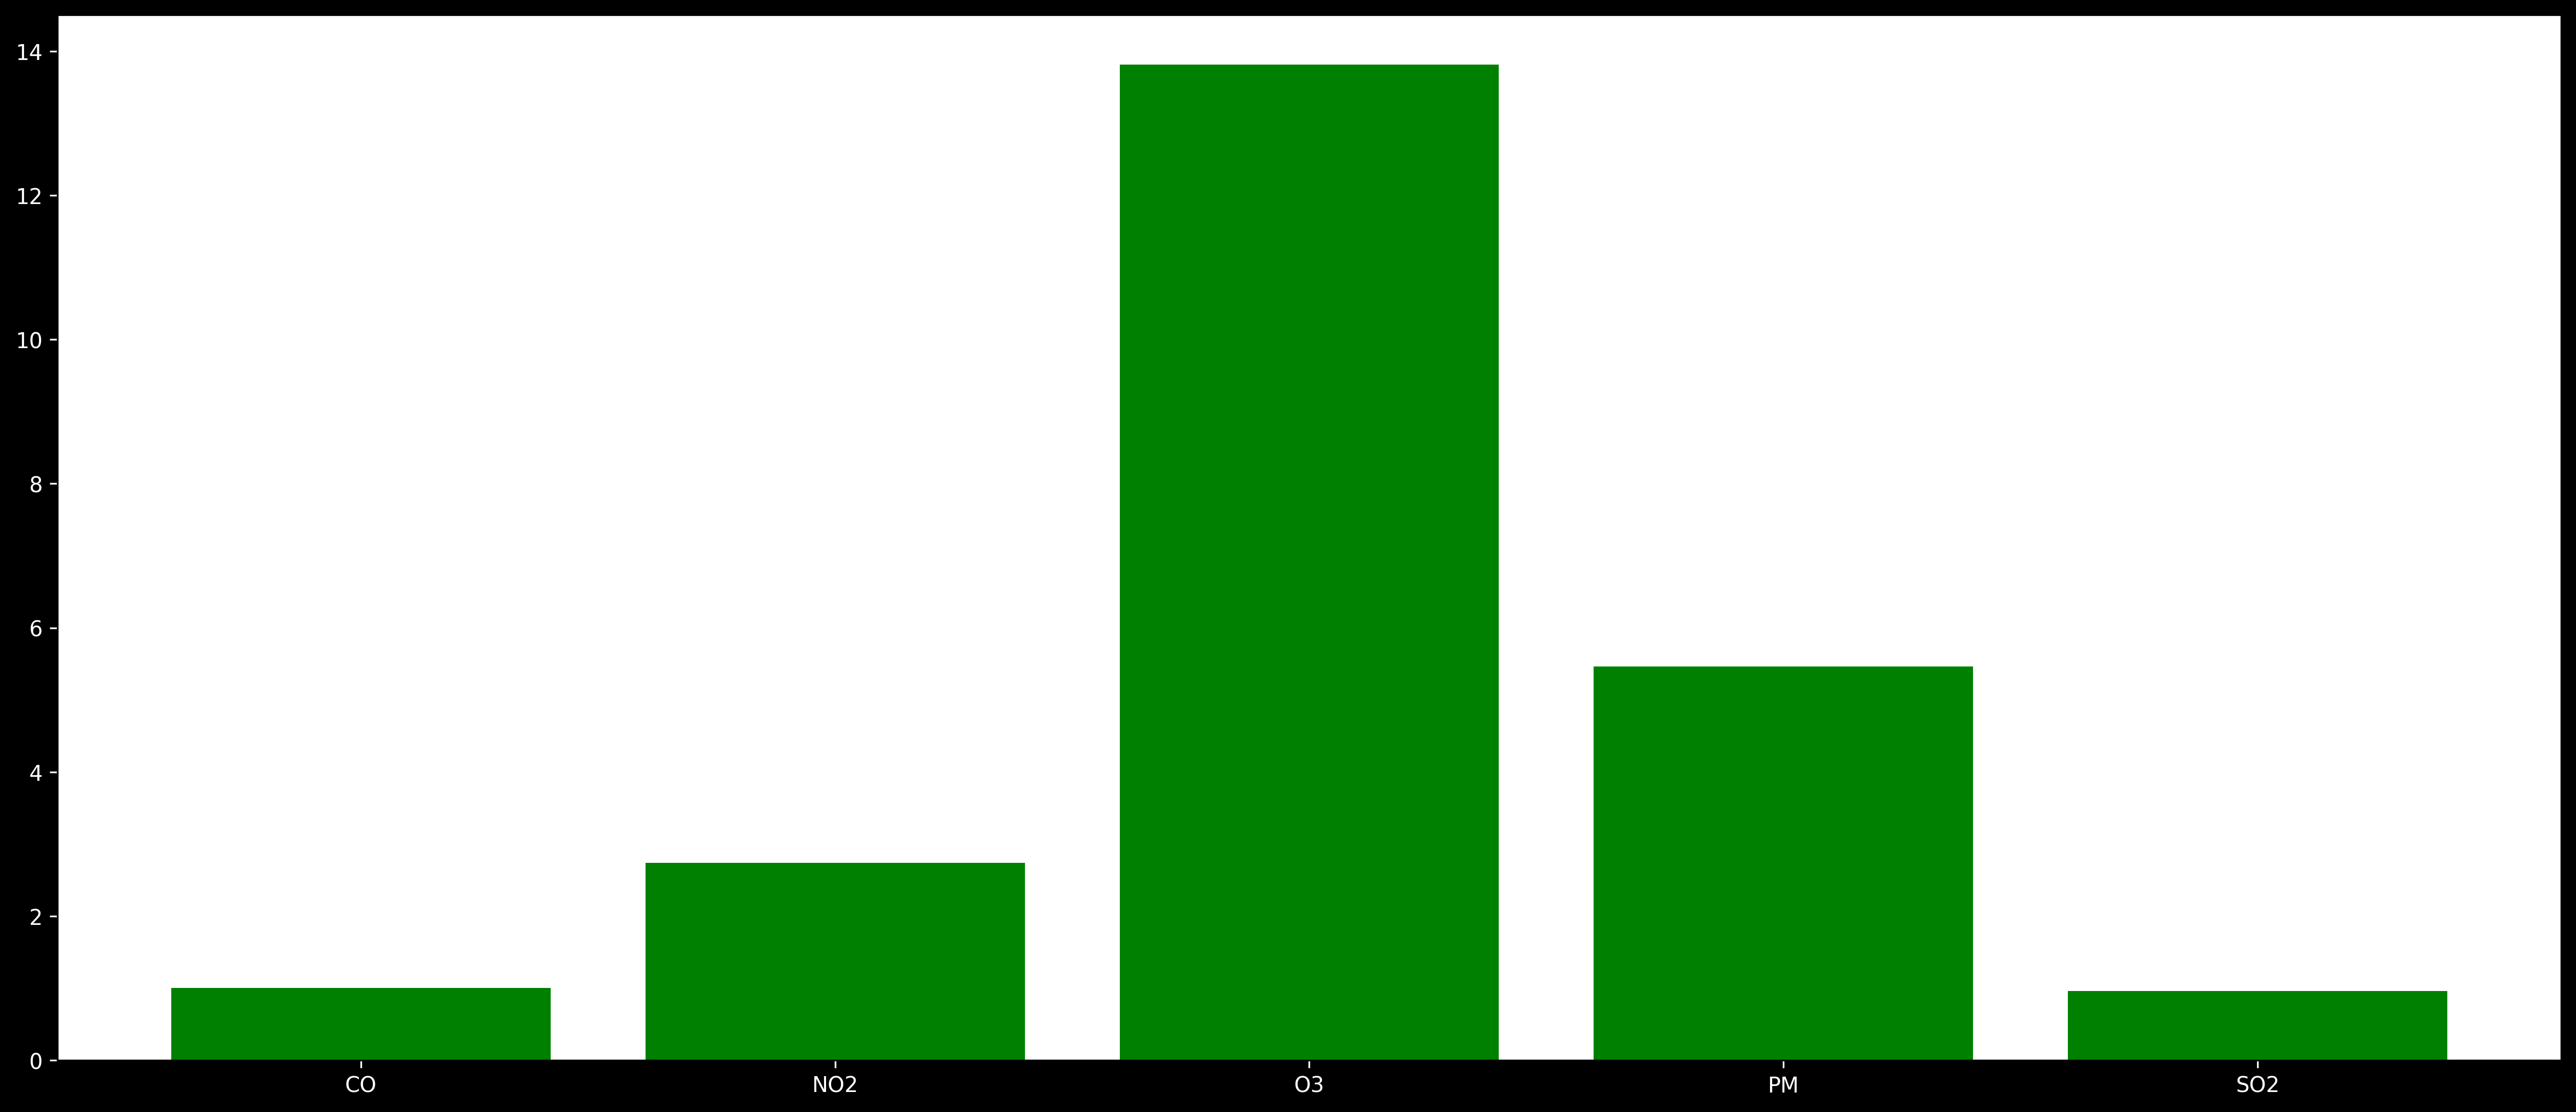

In [91]:
plt.figure(figsize=[21,9], dpi=300, facecolor='black', edgecolor='black')
plt.bar(pollutant.index, pollutant.values, color='green')
plt.tick_params(axis='x', colors='white')
plt.tick_params(axis='y', colors='white')
plt.show()

We can clearly see that O3 has the biggest impact on the air quality index.

##Which arrondissement has the worst air quality?

In [92]:
arrondissement = df['arrondissement_ville'].unique()
arrondissement

array(['Rivière-des-Prairies', 'Anjou', 'Montréal-Nord', 'Mont-Royal',
       'Ville-Marie', 'Hochelaga-Maisonneuve', 'Dorval',
       'Rosemont-La Petite-Patrie', 'Sainte-Anne-de-Bellevue',
       'Sud-Ouest'], dtype=object)

We have 10 boroughs.

Let's picture the average air quality index for each borough.

In [93]:
borough = df.groupby('arrondissement_ville')['valeur'].mean()
borough

arrondissement_ville
Anjou                        5.050000
Dorval                       5.933333
Hochelaga-Maisonneuve        7.400000
Mont-Royal                   6.250000
Montréal-Nord                5.416667
Rivière-des-Prairies         5.745614
Rosemont-La Petite-Patrie    5.533333
Sainte-Anne-de-Bellevue      6.083333
Sud-Ouest                    8.088889
Ville-Marie                  4.386667
Name: valeur, dtype: float64

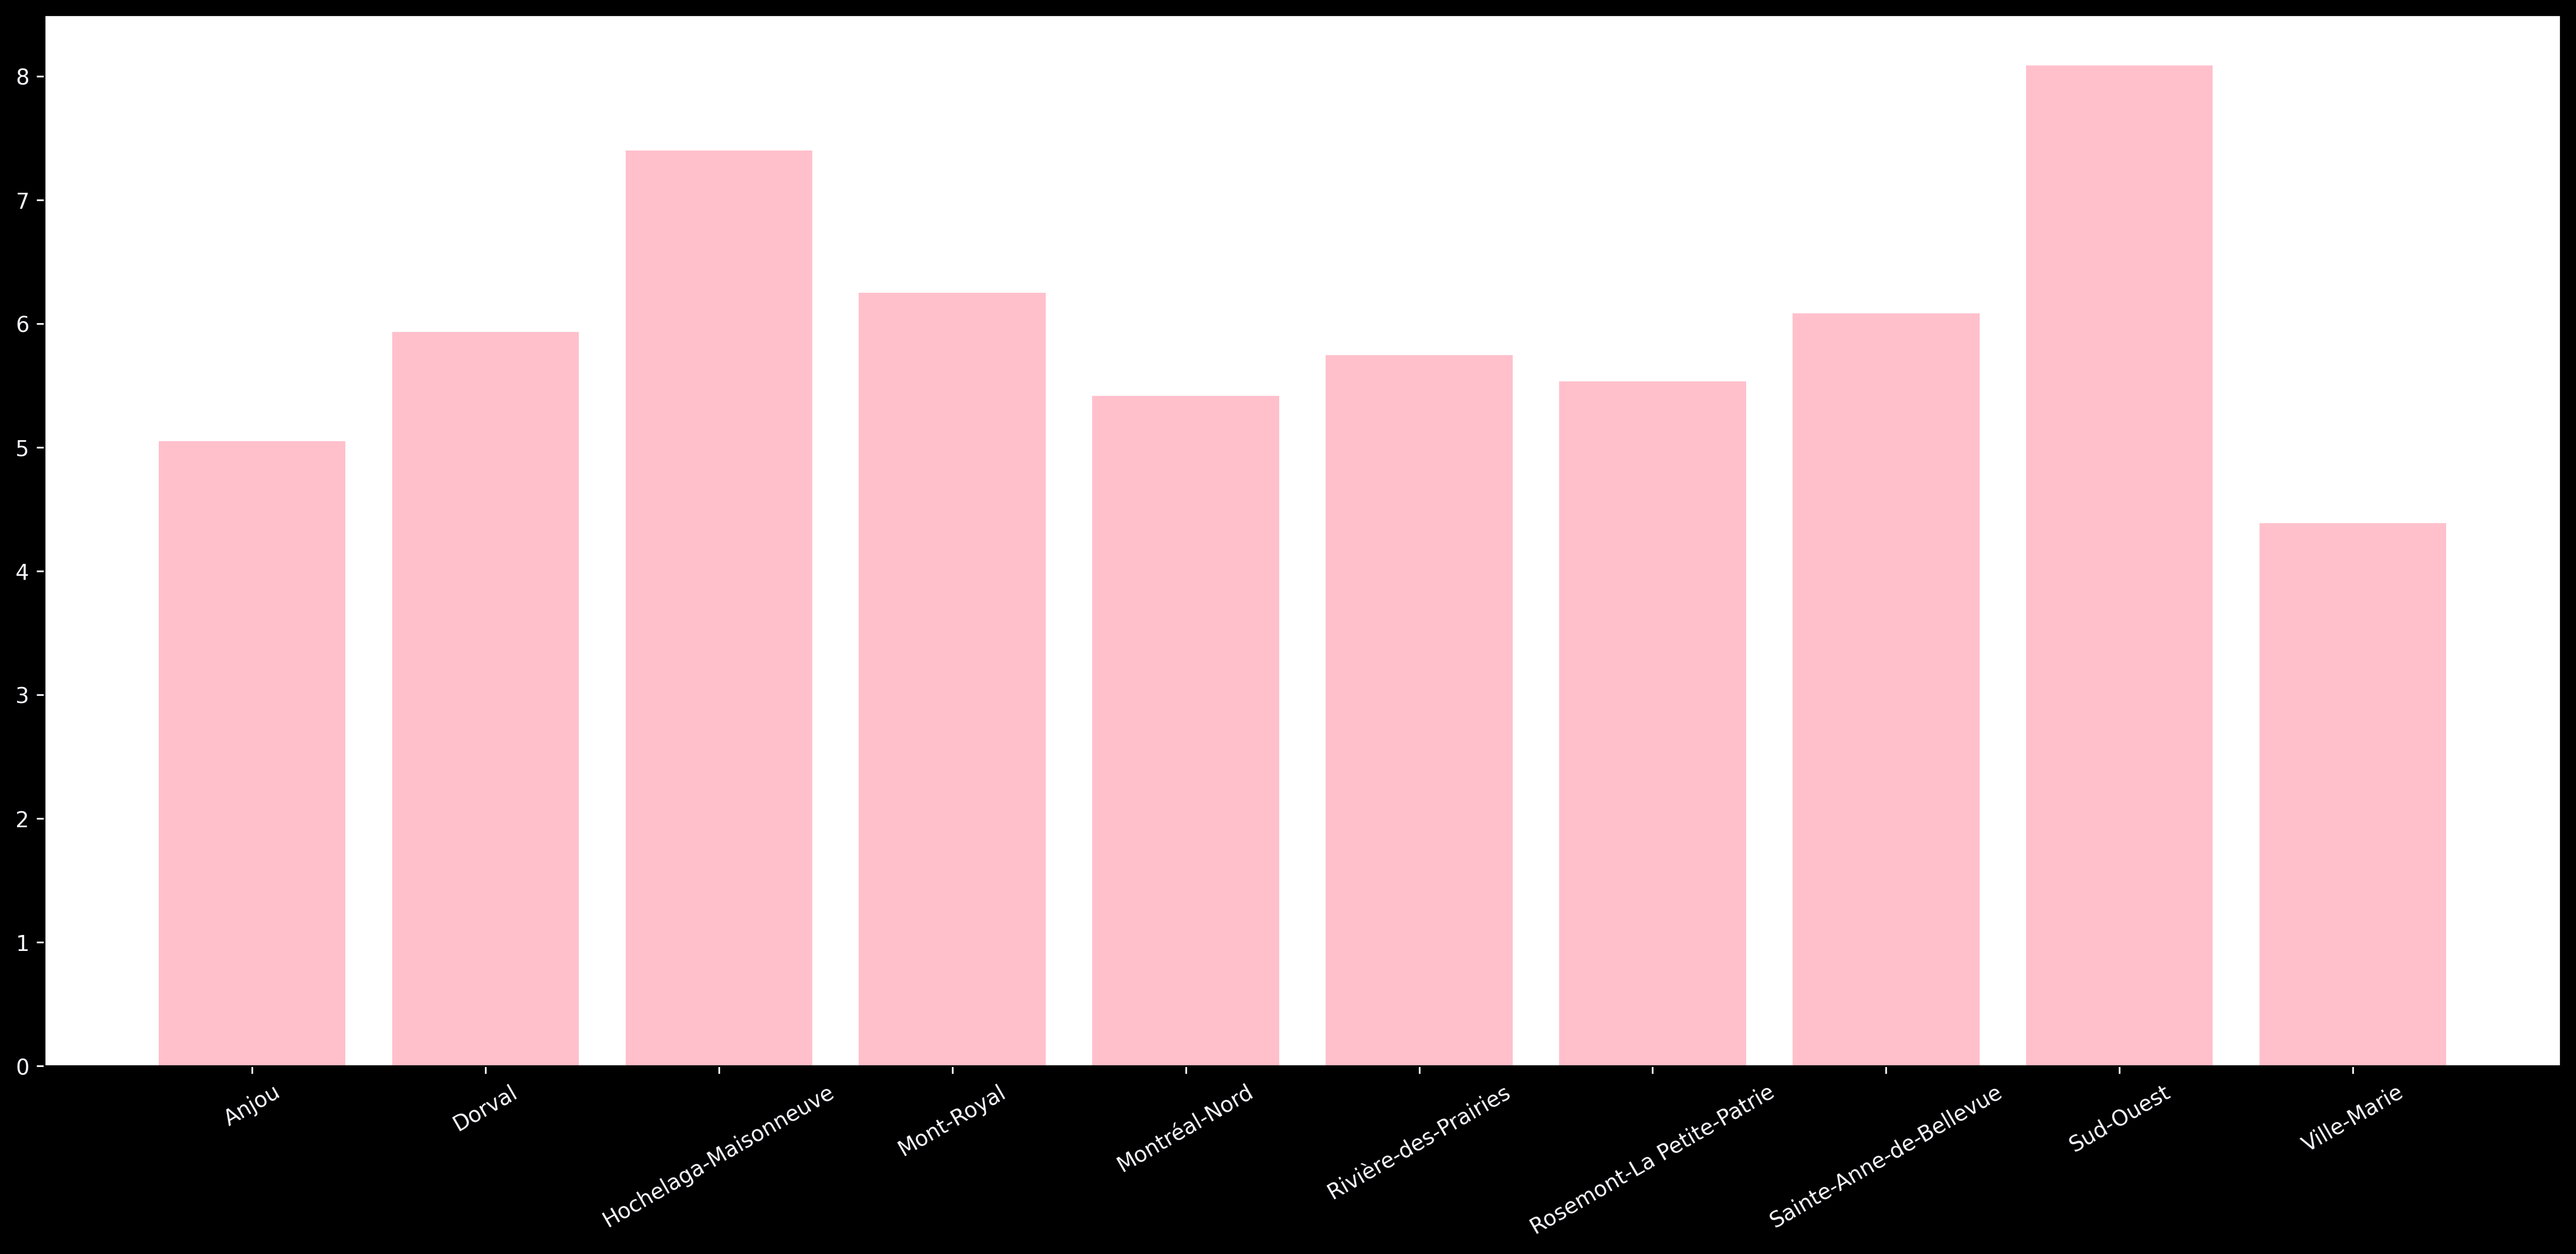

In [94]:
plt.figure(figsize=[21,9], dpi=300, facecolor='black', edgecolor='black')
plt.bar(borough.index, borough.values, color='pink')
plt.tick_params(axis='x', colors='ghostwhite', labelrotation=30)
plt.tick_params(axis='y', colors='ghostwhite')
plt.show()

We can clearly see that Sud-Ouest and Hochelaga-Maisonneuve have, on average, the worst air quality in Montreal.

Why's that? It is because they have a high concentration of factories. Indeed, Sud-Ouest has factories due to Canal Lachine, and Hochelaga-Maisonneuve has factories and shipping companies because it has the Port of Montreal. Thus, it is a central point in Montreal industrial development.

#Machine Learning

Let's start our machine learning work.

Let's choose a model.

In [95]:
from sklearn.linear_model import LinearRegression

Let's set the parameters of the model.

In [96]:
model = LinearRegression()
model

LinearRegression()

Let's create a feature matrix and target vector.

In [97]:
feature_df=target_df.drop(columns=['valeur'])
feature_df

,polluant,heure,arrondissement_ville,secteur_nom,hauteur
stationId,,,,,
3,1,0,1,1,4.0
3,2,0,1,1,4.0
3,3,0,1,1,4.0
3,4,0,1,1,4.0
3,1,1,1,1,4.0
...,...,...,...,...,...
103,2,13,10,3,4.0
103,3,13,10,3,4.0
103,1,14,10,3,4.0


Let's use the fit function.

In [98]:
model.fit(feature_df,target_df)

LinearRegression()

In [99]:
model.coef_

array([[ 1.00000000e+00,  3.68977919e-17,  4.26488308e-17,
        -8.21063964e-17,  6.39037893e-18],
       [-1.32646725e+00,  9.05368674e-02,  1.67481289e-01,
        -2.85121651e-01, -8.76715814e-02],
       [ 1.99469515e-16,  1.00000000e+00,  1.11022302e-16,
        -5.82867088e-16,  3.33066907e-16],
       [-3.88879945e-15, -1.11022302e-16,  1.00000000e+00,
        -3.15719673e-16, -3.33066907e-16],
       [-1.78369219e-15, -7.63278329e-17, -4.05925293e-16,
         1.00000000e+00, -7.63278329e-17],
       [-4.54282829e-16,  1.11022302e-16,  1.11022302e-16,
        -6.21031004e-16,  1.00000000e+00]])

In [100]:
model.intercept_

array([-4.88498131e-15,  9.26394748e+00,  2.66453526e-15,  1.59872116e-14,
        7.10542736e-15,  5.32907052e-15])

Then, let's predict!

In [101]:
x_predict = target_df.head(1)
x_predict

,polluant,valeur,heure,arrondissement_ville,secteur_nom,hauteur
stationId,,,,,,
3,1,1,0,1,1,4.0


In [102]:
model.predict(x_predict)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- valeur
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


ValueError: ignored